In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wardabilal/spotify-global-music-dataset-20092025")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'spotify-global-music-dataset-20092025' dataset.
Path to dataset files: /kaggle/input/spotify-global-music-dataset-20092025


In [11]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [8]:
import os

# The 'path' variable is a directory, not a file.
# We need to specify the actual CSV file within that directory.
# Based on the kernel state, 'spotify_data clean.csv' is one of the files available.
csv_file_name = 'spotify_data clean.csv'
csv_file_full_path = os.path.join(path, csv_file_name)

df = pd.read_csv(csv_file_full_path)

In [9]:
print(df.head())

                 track_id                                       track_name  \
0  3EJS5LyekDim1Tf5rBFmZl                    Trippy Mane (ft. Project Pat)   
1  1oQW6G2ZiwMuHqlPpP27DB                                             OMG!   
2  7mdkjzoIYlf1rx9EtBpGmU                                      Hard 2 Find   
3  67rW0Zl7oB3qEpD5YWWE5w  Still Get Like That (ft. Project Pat & Starrah)   
4  15xptTfRBrjsppW0INUZjf                            ride me like a harley   

   track_number  track_popularity  explicit artist_name  artist_popularity  \
0             4                 0      True       Diplo                 77   
1             1                 0      True    Yelawolf                 64   
2             1                 4      True   Riff Raff                 48   
3             8                30      True       Diplo                 77   
4             2                 0      True     Rumelis                 48   

   artist_followers                      artist_genres  \
0   

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [13]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


In [14]:
df.shape

(8582, 15)

In [15]:
df.columns

Index(['track_id', 'track_name', 'track_number', 'track_popularity',
       'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
       'artist_genres', 'album_id', 'album_name', 'album_release_date',
       'album_total_tracks', 'album_type', 'track_duration_min'],
      dtype='object')

In [16]:
df.dtypes

,0
track_id,object
track_name,object
track_number,int64
track_popularity,int64
explicit,bool
artist_name,object
artist_popularity,int64
artist_followers,int64
artist_genres,object
album_id,object


In [17]:
df.isnull().sum()

,0
track_id,0
track_name,0
track_number,0
track_popularity,0
explicit,0
artist_name,3
artist_popularity,0
artist_followers,0
artist_genres,3361
album_id,0


In [18]:
most_common_artist = df["artist_name"].mode()[0]
df["artist_name"] = df["artist_name"].fillna(most_common_artist)

In [19]:
most_common_genre = df["artist_genres"].mode()[0]
df["artist_genres"] = df["artist_genres"].fillna(most_common_genre)


In [20]:
df.isnull().sum()

,0
track_id,0
track_name,0
track_number,0
track_popularity,0
explicit,0
artist_name,0
artist_popularity,0
artist_followers,0
artist_genres,0
album_id,0


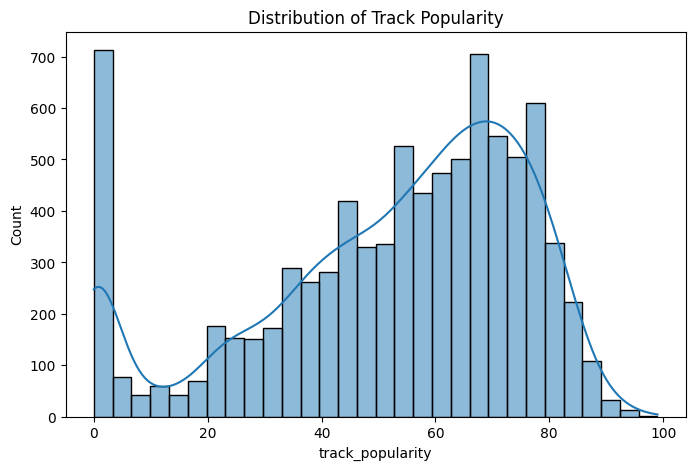

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df["track_popularity"], bins=30, kde=True)
plt.title("Distribution of Track Popularity")
plt.show()

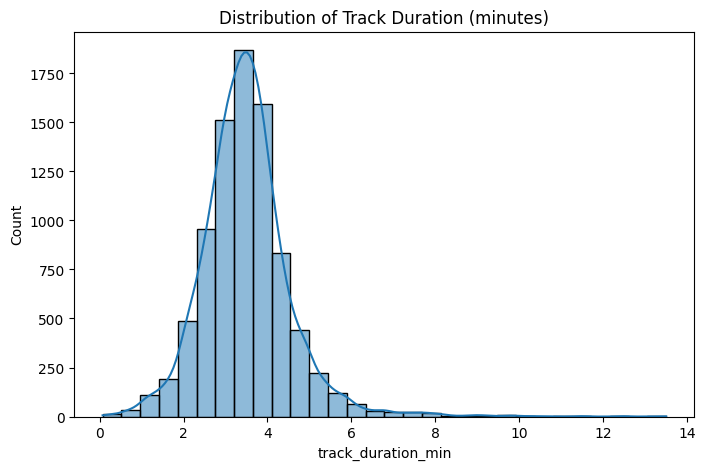

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df["track_duration_min"], bins=30, kde=True)
plt.title("Distribution of Track Duration (minutes)")
plt.show()

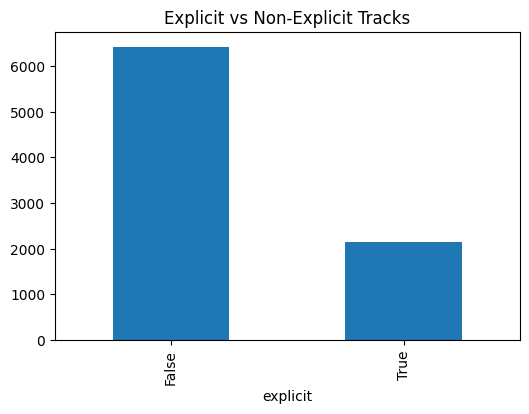

In [23]:
df["explicit"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Explicit vs Non-Explicit Tracks")
plt.show()

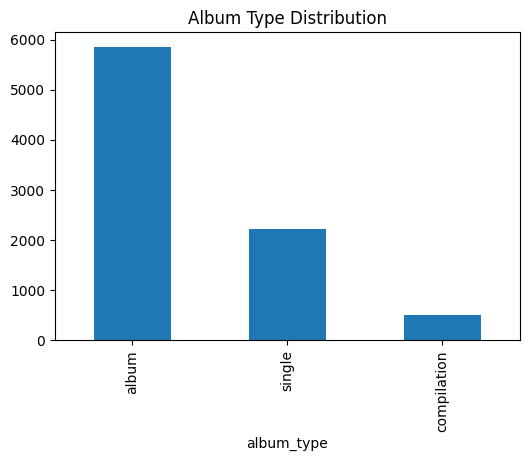

In [24]:
df["album_type"].value_counts().plot(kind="bar", figsize=(6,4))
plt.title("Album Type Distribution")
plt.show()

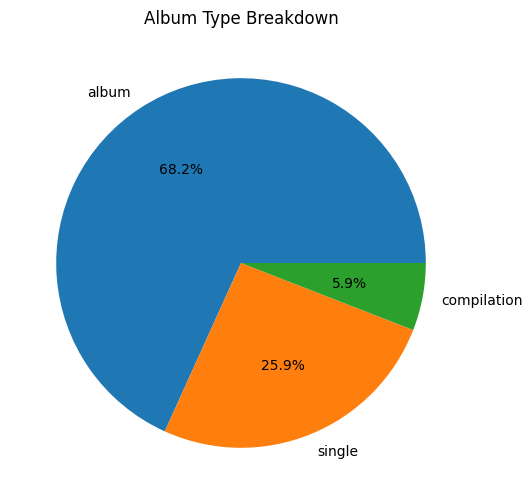

In [25]:
df["album_type"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Album Type Breakdown")
plt.ylabel("")
plt.show()


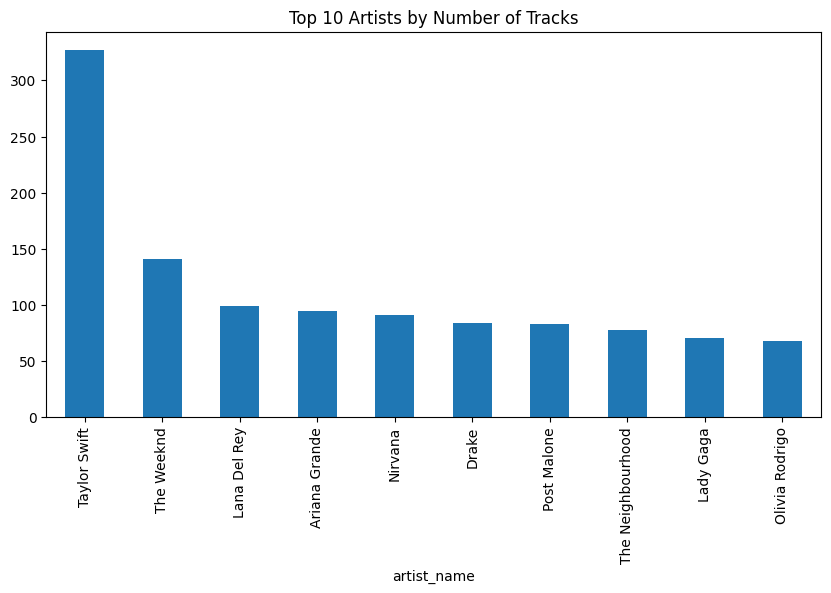

In [26]:
top_artists = df["artist_name"].value_counts().head(10)
top_artists.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Artists by Number of Tracks")
plt.show()

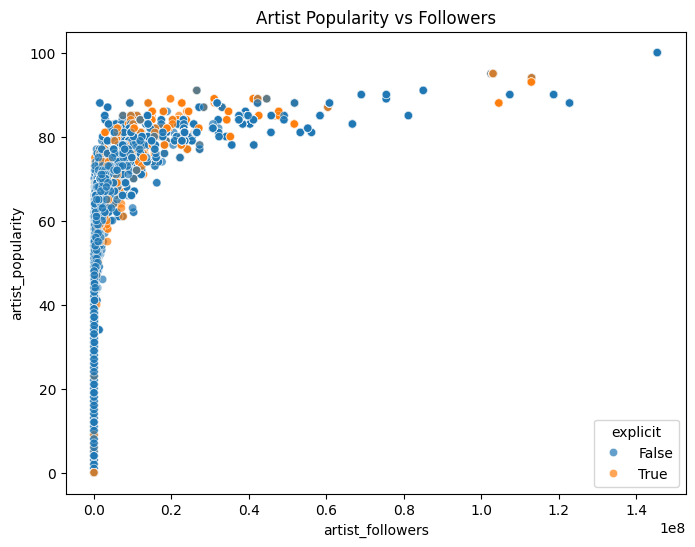

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="artist_followers",
    y="artist_popularity",
    hue="explicit",
    alpha=0.7
)
plt.title("Artist Popularity vs Followers")
plt.show()

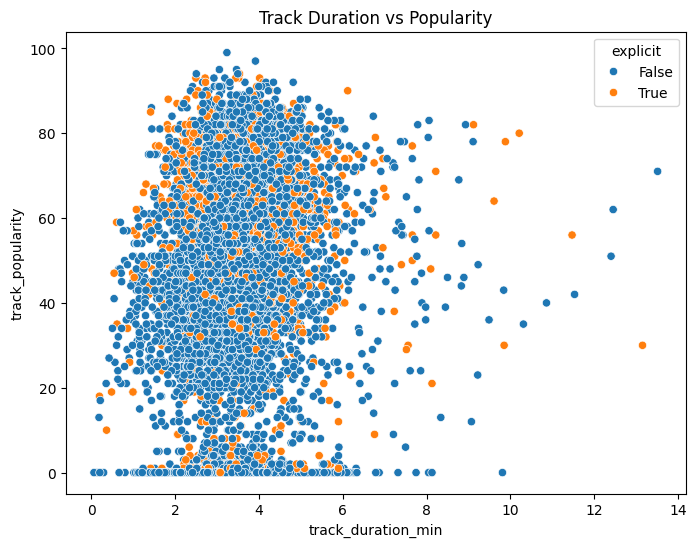

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="track_duration_min",
    y="track_popularity",
    hue="explicit"
)
plt.title("Track Duration vs Popularity")
plt.show()


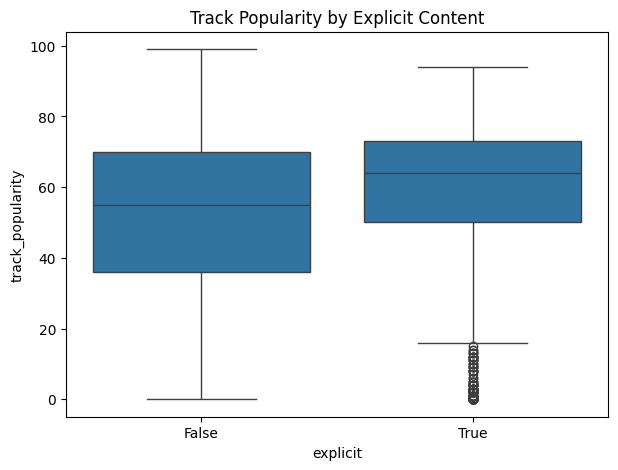

In [29]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x="explicit",
    y="track_popularity"
)
plt.title("Track Popularity by Explicit Content")
plt.show()


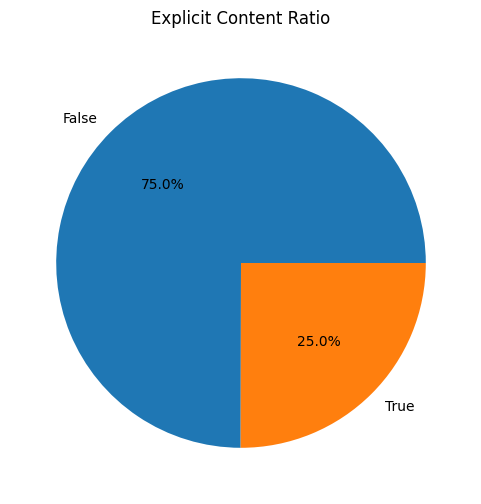

In [30]:
df["explicit"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Explicit Content Ratio")
plt.ylabel("")
plt.show()

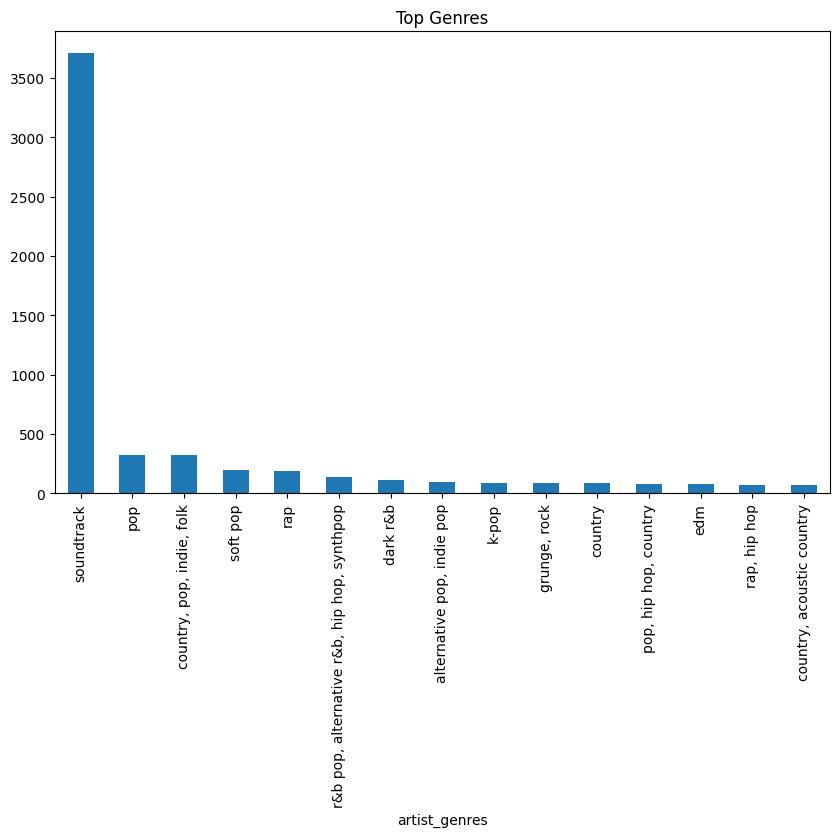

In [31]:
top_genres = df["artist_genres"].value_counts().head(15)
top_genres.plot(kind="bar", figsize=(10,6))
plt.title("Top Genres")
plt.show()


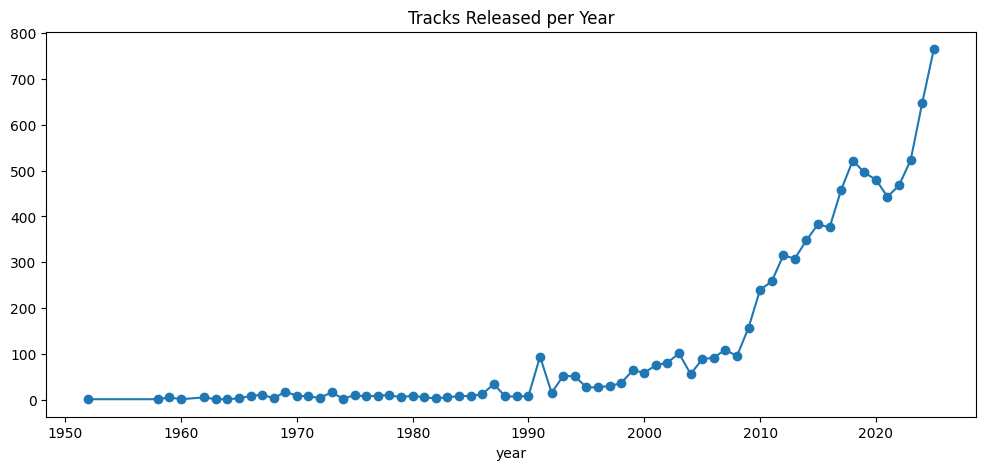

In [32]:
df["year"] = pd.to_datetime(df["album_release_date"]).dt.year

plt.figure(figsize=(12,5))
df["year"].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Tracks Released per Year")
plt.show()

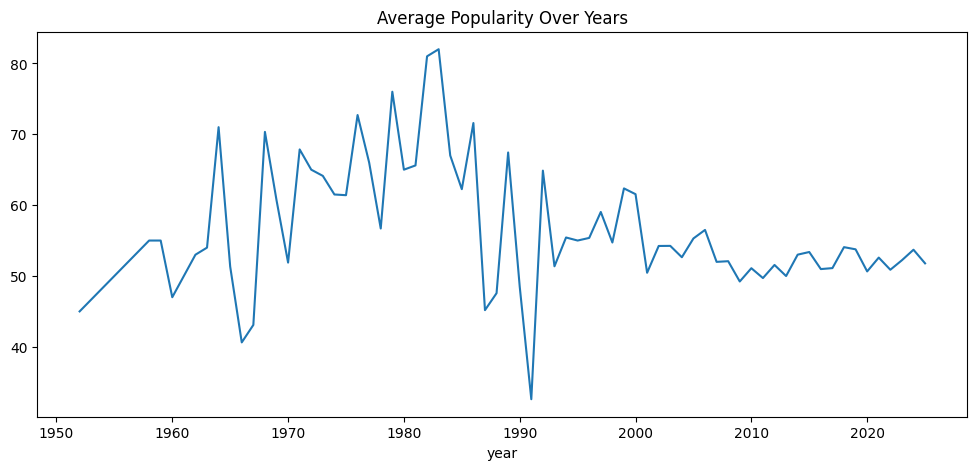

In [33]:
pop_year = df.groupby("year")["track_popularity"].mean()

plt.figure(figsize=(12,5))
pop_year.plot(kind="line")
plt.title("Average Popularity Over Years")
plt.show()

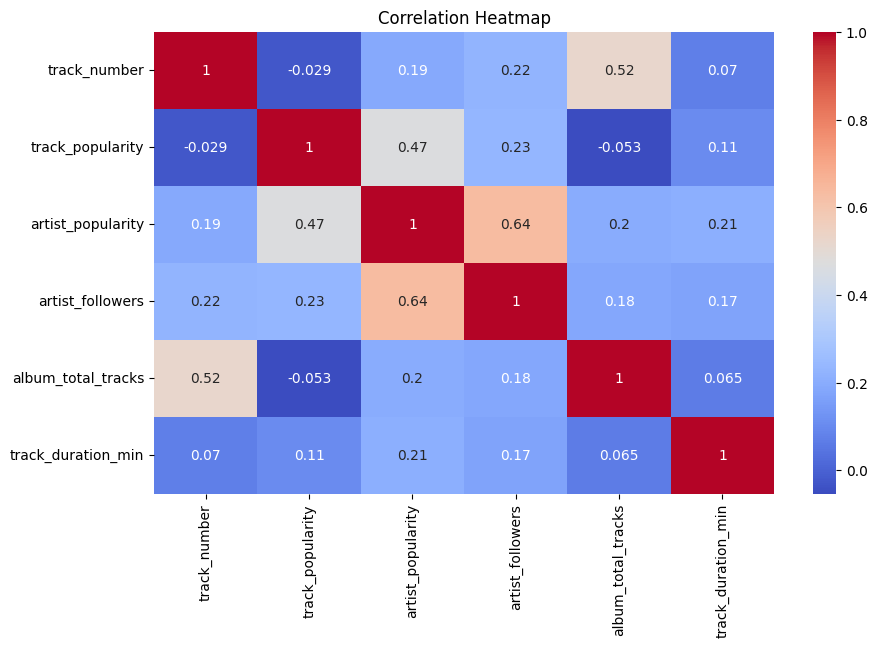

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[[
    "track_number","track_popularity","artist_popularity",
    "artist_followers","album_total_tracks","track_duration_min"
]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()